## CHURN PREDICTION

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import randint

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head(3)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1

lets explore the feautures avaialable

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From the info we can see that, there are 14 columns with 2 float, 9 integers and 3 objects. Non of the columns have null values.

In [21]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

### Data Exploration

In this section, I am going to explore some of the features using univariate or multivarite analysis to understand the patterns present

<Axes: xlabel='Geography', ylabel='count'>

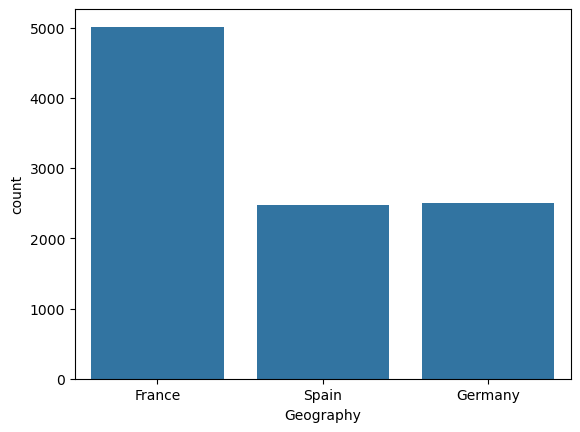

In [9]:
sns.countplot(data = df, x = 'Geography')

The three countries are France, Spain and Germany. France is the most represented in the dataset with 5,000 customers while Spain and Germany are on almost same values of about 2,500.

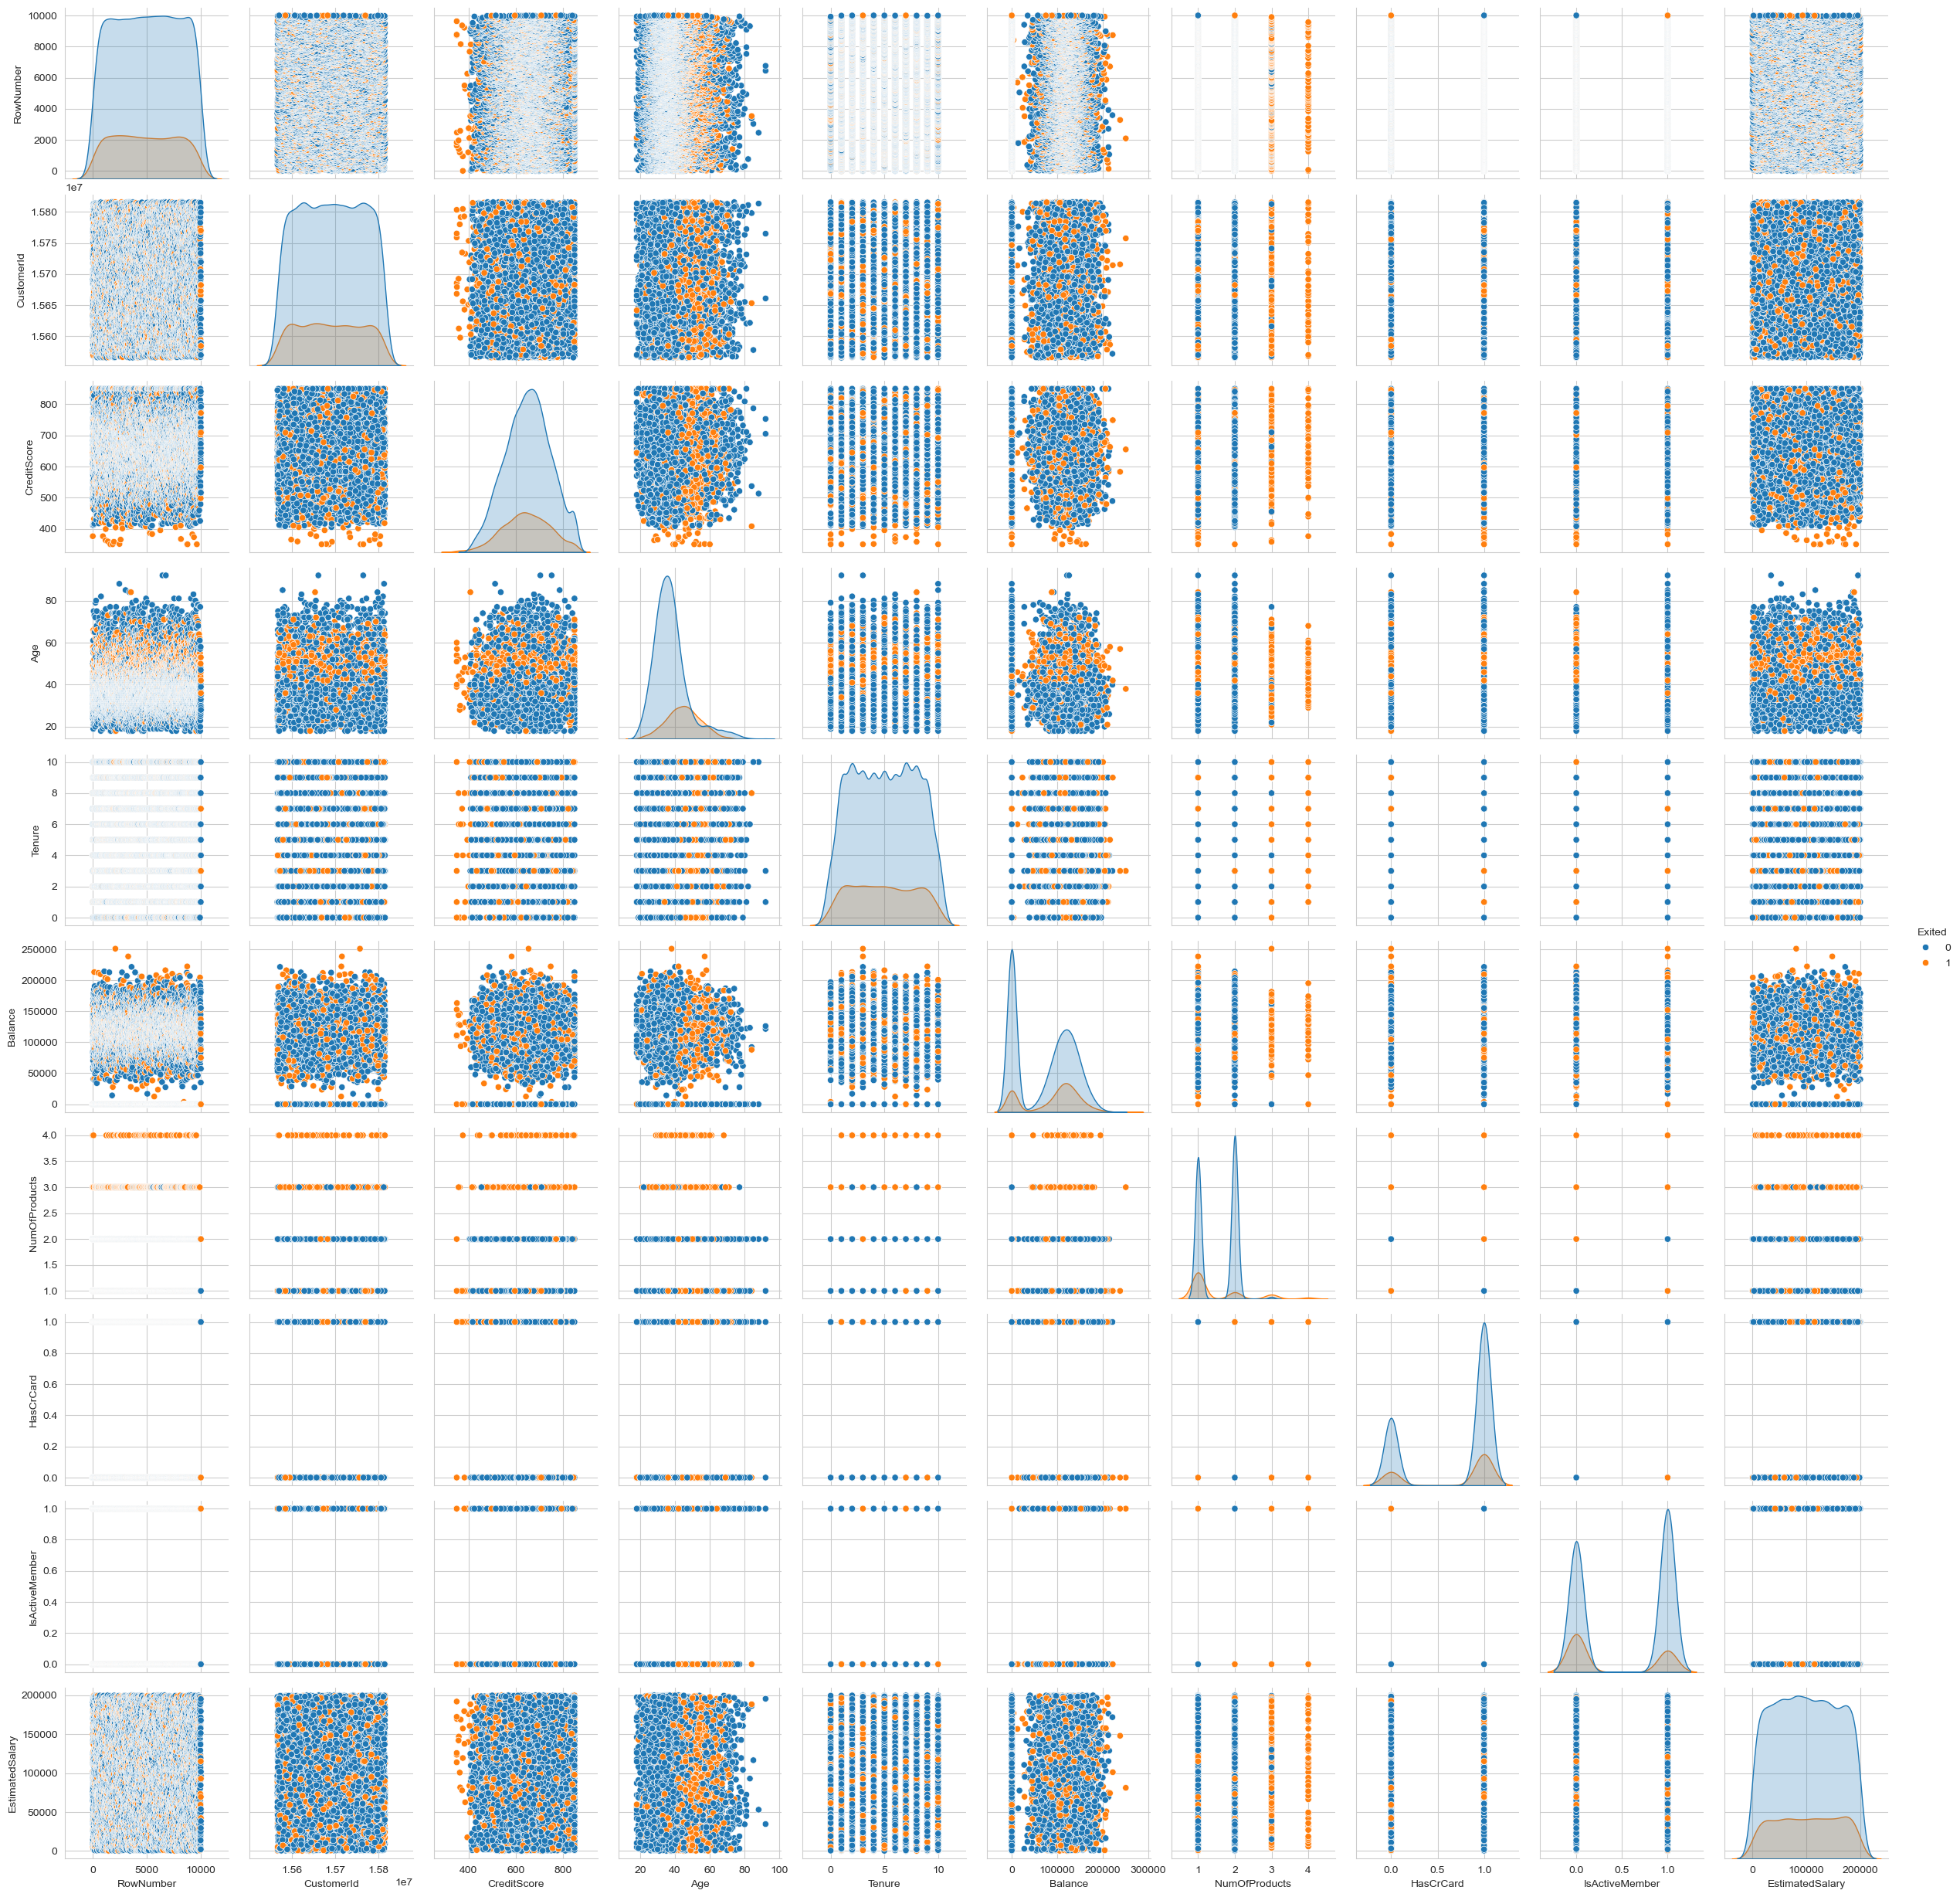

In [25]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Exited");
plt.show();

As seen, most of the feautures have realtionships that appears to be uniform all through between them. When we however observe the exited hue in pink, we can see different patterns of relationships. For example the age and creditscores of customers has a uniform relationship but the exited pink hue is mostly concentrated along the middle which suggest that most of the customers that exited (churn) are in the midlle age. This can help the bank to focus on this group of people because once they are able to stay, they will be easier to retain at later ages. Also for number of products, it can be observed that more people with 3 or 4 products exited than those with just 1 or two products.  In terms of data distribution, we can observe that majority of the features assumes the shape of a normal distribution apart from age which appears to be a little right skewed. 

I will take a deeper look into some of the features.

**Age and Credit Score**

<Axes: xlabel='Age', ylabel='CreditScore'>

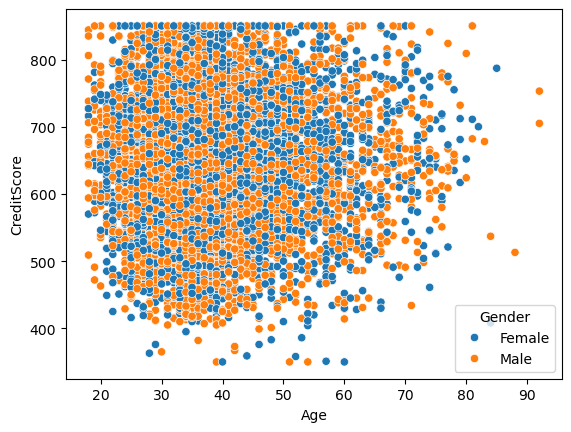

In [12]:
sns.scatterplot(data=df, x="Age", y= "CreditScore", hue= "Gender")

Age and credit score appears to have no relationship and the gender seems to be evenly spread among the different ages and credit scores. I will take a deeper look into the realtionship using a regression plot whcih is able to pin out even smallest reationship.

<Axes: xlabel='Age', ylabel='CreditScore'>

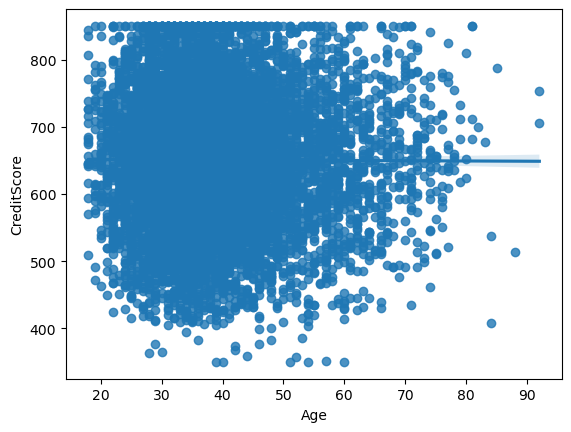

In [6]:
sns.regplot(data=df, x="Age", y="CreditScore")

Age and Credit score appears to have little to no relationship.

**Age and number of products**

In [38]:
import statsmodels

<Axes: xlabel='Age', ylabel='NumOfProducts'>

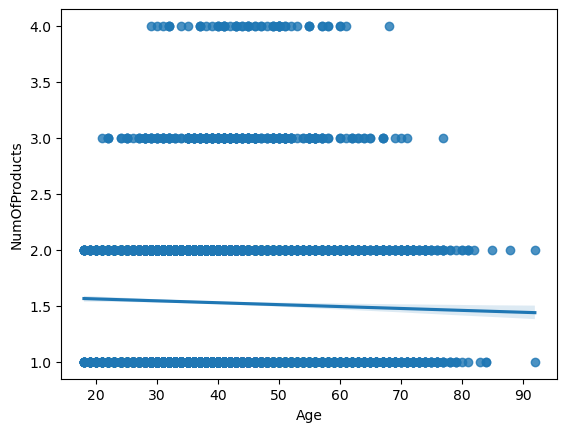

In [8]:
sns.regplot(data=df, x= 'Age', y= 'NumOfProducts') 

The number of products and age have a slightly negative relationship with older people susbcribing to less product

**Age and HasCreditCard**

<Axes: xlabel='Age', ylabel='HasCrCard'>

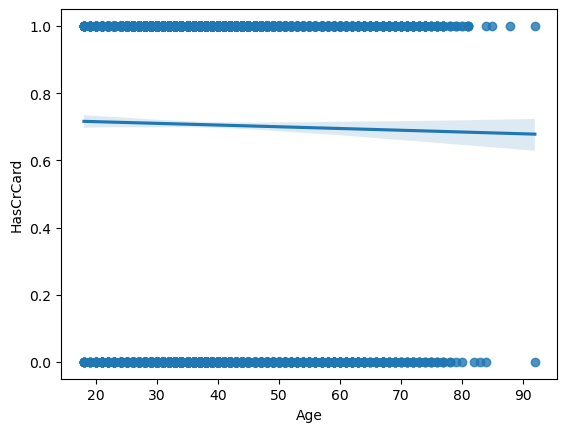

In [13]:
sns.regplot(x= df['Age'], y= df['HasCrCard'], logistic= True)

Age and whether a person has a card or not aslo has a slight negative relationship which means the older a person get the less likely they are to have credit card.

**Age, Balance, IsActiveMember and Exited**

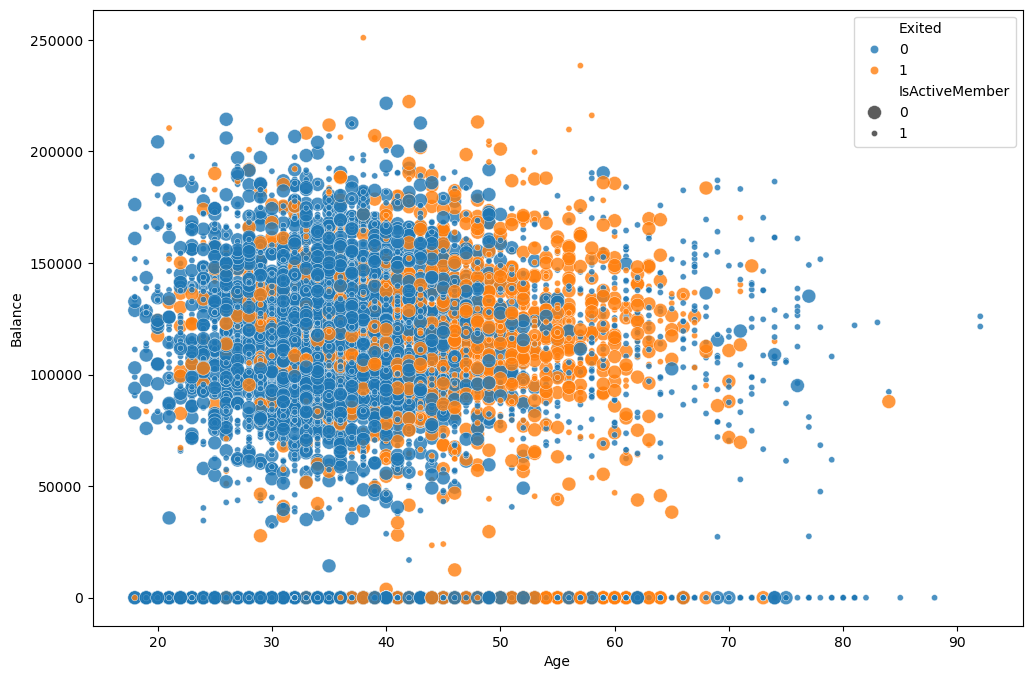

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Age", 
                y="Balance",
                size="IsActiveMember",
                sizes=(20,100),
                alpha=0.8,
                hue="Exited",
                data=df);

from the image, it can be oberserved that age has a no observable relationship with with balance. Majority of the exited between the ages of 50 to 60 as earlier pointed out. The active members are however almost evenly spread out throughout the ages and account balance. It can however be noted that less older customers fall into the 'not active' category.

I will now take a look at the distribution of the target variable 

Text(0.5, 0, 'Exited')

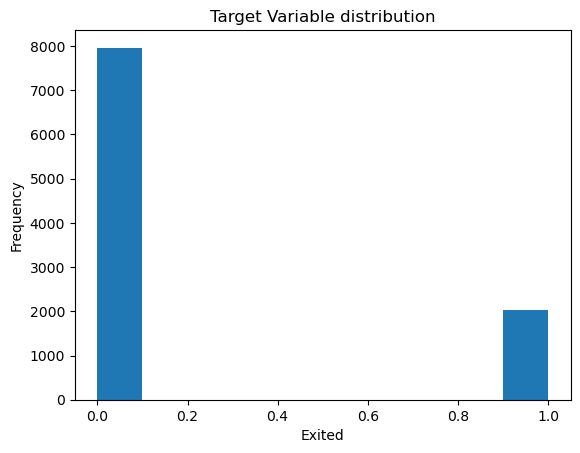

In [20]:
df['Exited'].plot(kind='hist', title= 'Target Variable distribution')
plt.xlabel('Exited')

As seen, the distribution is not uniform as there are more 1 than 0. This means less customer exited the bank. This is what is expected in by the way. Since the data is not balanced, we have to balance it later on to ensure our model performs well with both exited observations.

### Feature Engineering

For feature engineering, I will first have to convert all the columns to float by getting dummies of the categorical variables and converting other object columns to float or integer

In [9]:
data= pd.get_dummies(data= df.drop('Surname', axis=1), drop_first= True, dtype= int)
data.head(2)

RowNumber  CustomerId  CreditScore  Age  Tenure   Balance  NumOfProducts  \
0          1    15634602          619   42       2      0.00              1   
1          2    15647311          608   41       1  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0          1               1        101348.88       1                  0   
1          0               1        112542.58       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_Germany  10000 non-null  int32  
 12  Geography_Spain    10000 non-null  int32  
 13  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB


All the columns are now in numerical data types. the geography shows that only Spain and Germany are in the data, this is due to the drop first argument passed for the get dummies. This will not affect anything as any value not Spain or Germany is definately France. This also helps prevents colinearity.

I will investigate the correlation between features next.

<Axes: >

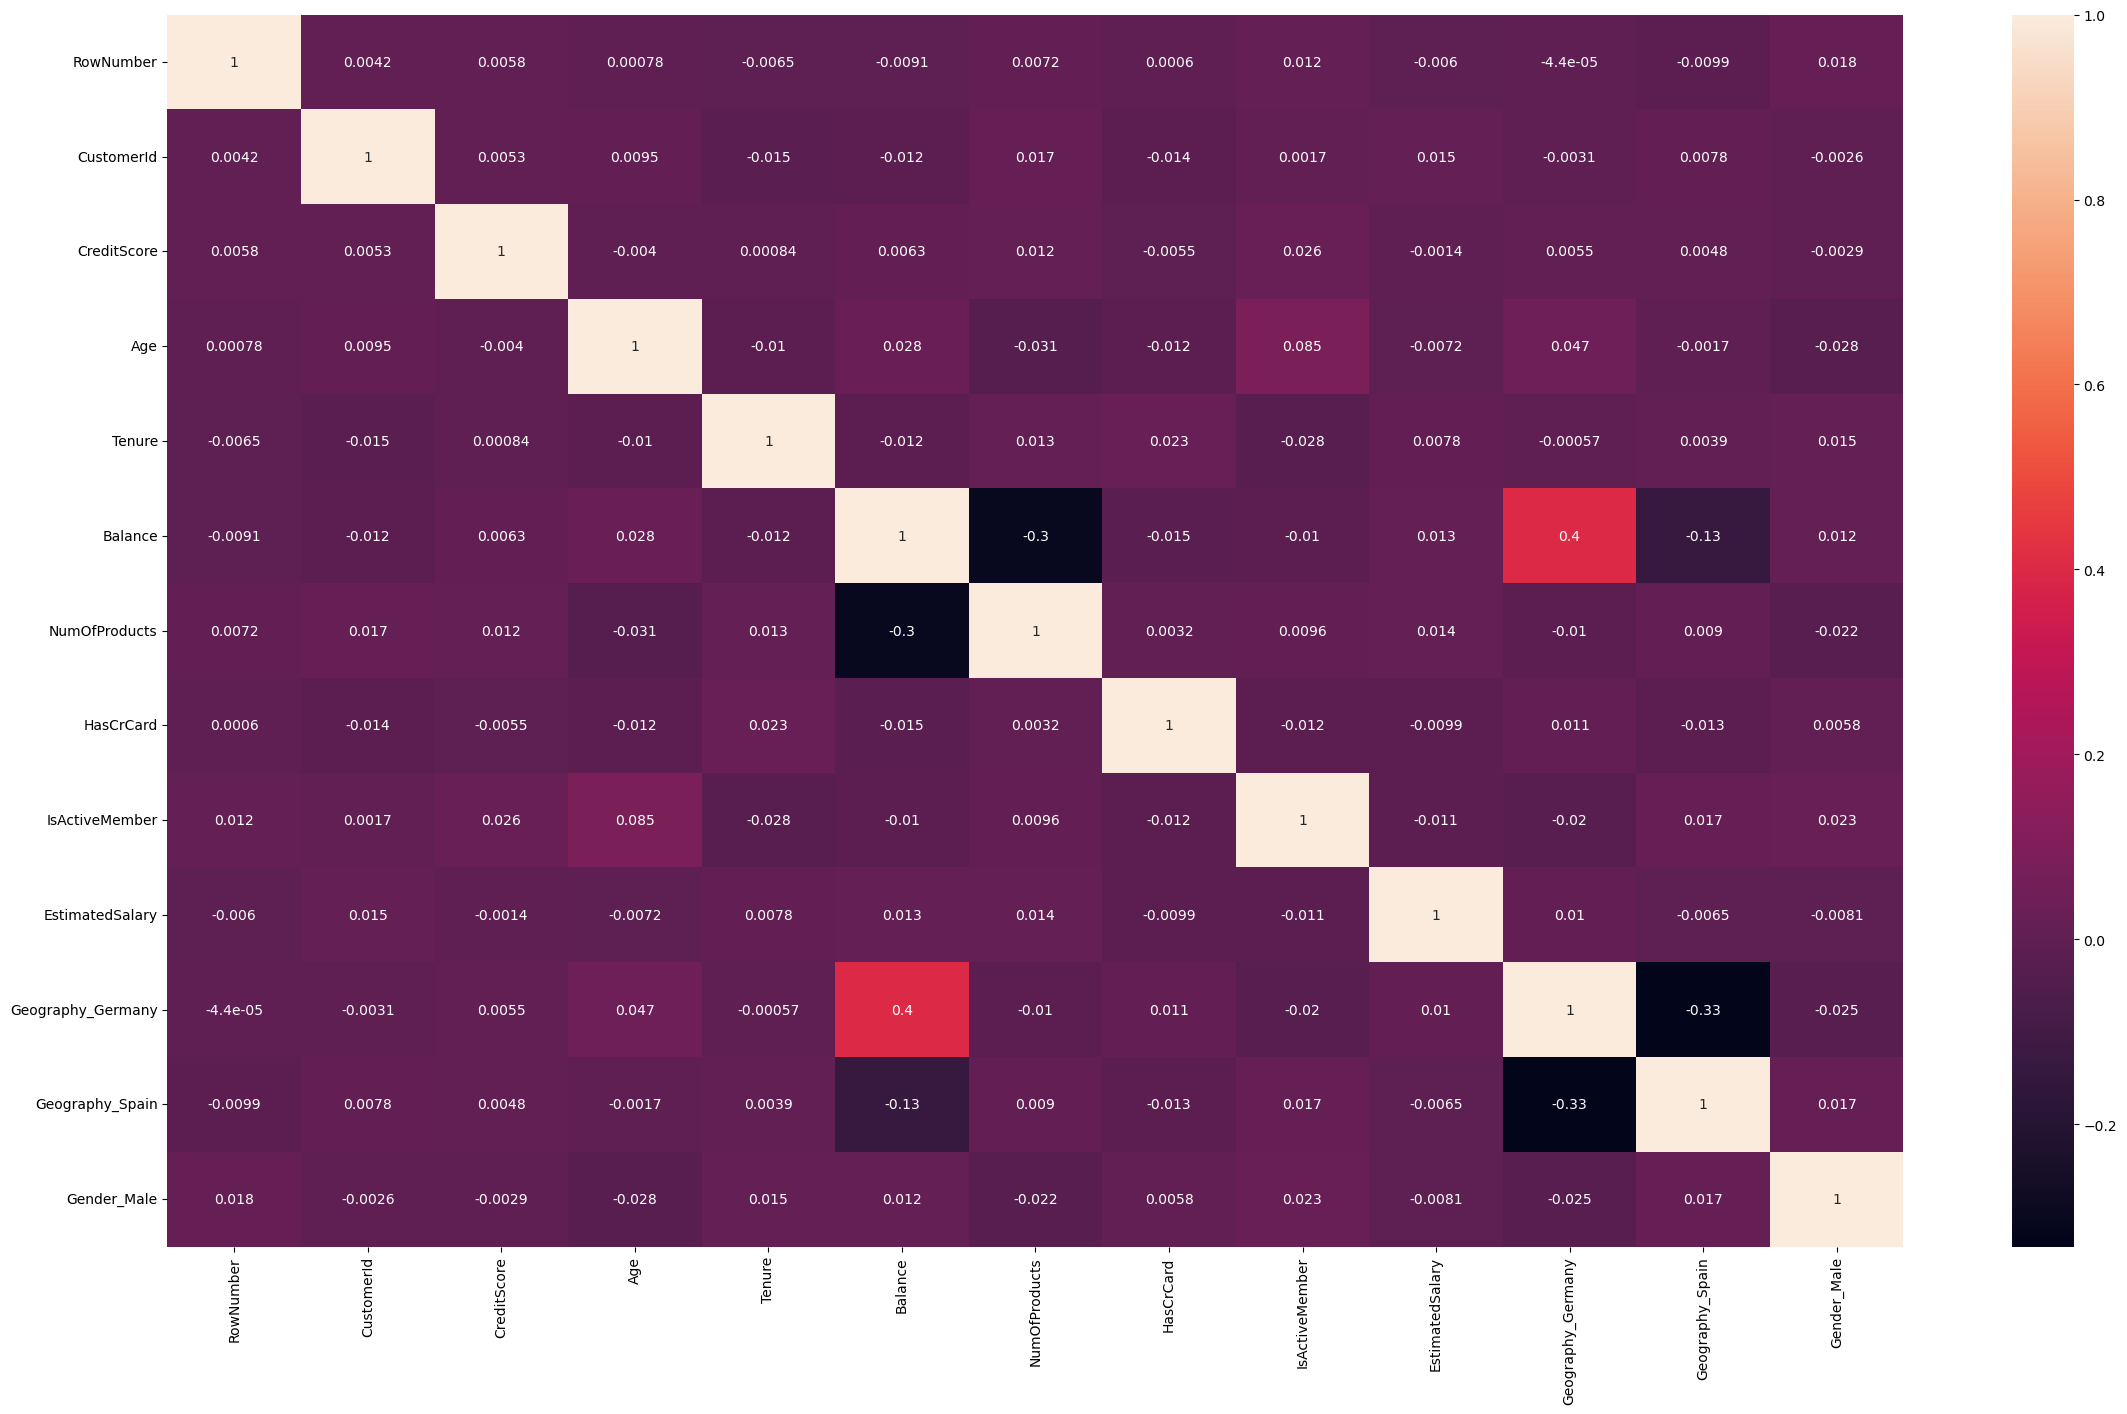

In [17]:
plt.figure(figsize=(28,16))
sns.heatmap(data.drop('Exited', axis=1).corr(), annot= True)

The correlation is good as there are no multicolinearity between the features.

### Modelling

I will now train different classification models on the dataset.

In [10]:
#feature selection
X, y= data.drop(['RowNumber','CustomerId','Exited'], axis=1), data['Exited']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#split into train and test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state=20)

### Feature Scaling
Although not much of a challenge for non-linear models, but I will be scaling the features so the values can fall within similar range

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
Scaler= StandardScaler()

In [15]:
X_train_Scaled=Scaler.fit_transform(X_train)
X_test_Scaled= Scaler.fit_transform(X_test)

**Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
#train the log reg model
log_reg= LogisticRegression()

In [35]:
log_reg.fit(X_train_Scaled, y_train)

LogisticRegression()

In [34]:
pred1=log_reg.predict(X_test_Scaled)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [45]:
print('Perfomance metrics')
print('****************************')
acc=accuracy_score(y_test, pred1)
pres= precision_score(y_test, pred1)
rec= recall_score(y_test, pred1)
f1= f1_score(y_test, pred1)

print('accuracy score is:', acc)
print('precision score is:', pres)
print('recall score is:', rec)
print('F1 score is:', f1)

Perfomance metrics
****************************
accuracy score is: 0.8146666666666667
precision score is: 0.547085201793722
recall score is: 0.21143847487001732
F1 score is: 0.305


The recall score, precision score and f1 scores are very low, this is due to the disparity between the datapoints for the target variable. I will therefore beed to balance the target variable.
I will be using SMOTE to up sample the smaller category.

In [46]:
data.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
x_bal, y_bal= SMOTE().fit_resample(X,y)

In [18]:
y_bal.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

As seen, the target variable now has the same number of datapoints for each category.

In [219]:
#split into train and test
X_train, X_test, y_train, y_test= train_test_split(x_bal,y_bal, test_size= 0.2, random_state=20)

In [20]:
X_train_Scaled=Scaler.fit_transform(X_train)
X_test_Scaled= Scaler.fit_transform(X_test)

**Logistic Regression**

In [24]:
#train the log reg model
log_reg_bal= LogisticRegression()
log_reg_bal.fit(X_train_Scaled, y_train)
pred2=log_reg_bal.predict(X_test_Scaled)

In [34]:
print('Perfomance metrics')
print('****************************')
acc2=accuracy_score(y_test, pred2)
pres2= precision_score(y_test, pred2)
rec2= recall_score(y_test, pred2)
f12= f1_score(y_test, pred2)

print('accuracy score is:', acc2)
print('precision score is:', pres2)
print('recall score is:', rec2)
print('F1 score is:', f12)

Perfomance metrics
****************************
accuracy score is: 0.7846829880728186
precision score is: 0.7907557776389756
recall score is: 0.7829313543599258
F1 score is: 0.7868241143567433


The performance is now much better with recall score of 78.7%, precision od 79.2% and other metrics about same value

**SVM**

In [28]:
from sklearn import svm

In [29]:
sv_model= svm.SVC()

In [30]:
sv_model.fit(X_train_Scaled, y_train)

SVC()

In [32]:
pred3= sv_model.predict(X_test_Scaled)

In [33]:
print('Perfomance metrics')
print('****************************')
acc3=accuracy_score(y_test, pred3)
pres3= precision_score(y_test, pred3)
rec3= recall_score(y_test, pred3)
f13= f1_score(y_test, pred3)

print('accuracy score is:', acc3)
print('precision score is:', pres3)
print('recall score is:', rec3)
print('F1 score is:', f13)

Perfomance metrics
****************************
accuracy score is: 0.8342749529190208
precision score is: 0.851063829787234
recall score is: 0.8163265306122449
F1 score is: 0.8333333333333334


**KNN**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
KNN= KNeighborsClassifier()
KNN.fit(X_train_Scaled, y_train)
pred4= KNN.predict(X_test_Scaled)

In [44]:
print('Perfomance metrics')
print('****************************')
acc4=accuracy_score(y_test, pred4)
pres4= precision_score(y_test, pred4)
rec4= recall_score(y_test, pred4)
f14= f1_score(y_test, pred4)

print('accuracy score is:', acc4)
print('precision score is:', pres4)
print('recall score is:', rec4)
print('F1 score is:', f14)

Perfomance metrics
****************************
accuracy score is: 0.82015065913371
precision score is: 0.8182926829268292
recall score is: 0.8299319727891157
F1 score is: 0.8240712311943507


### Non Linear Model

**Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

I will use randomsercv to get the best parameters.

In [50]:
#get best parameter for randomforest
param_dist = {'n_estimators': randint(20,200),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf_mod = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf_mod, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_Scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002027C504760>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002027C4C5040>})

In [51]:
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 94}


In [52]:
RF= RandomForestClassifier(max_depth= 18, n_estimators= 94, random_state= 20)

In [53]:
RF.fit(X_train_Scaled, y_train)
pred5= RF.predict(X_test_Scaled)

In [54]:
print('Perfomance metrics')
print('****************************')
acc5=accuracy_score(y_test, pred5)
pres5= precision_score(y_test, pred5)
rec5= recall_score(y_test, pred5)
f15= f1_score(y_test, pred5)

print('accuracy score is:', acc5)
print('precision score is:', pres5)
print('recall score is:', rec5)
print('F1 score is:', f15)

Perfomance metrics
****************************
accuracy score is: 0.8505963590709353
precision score is: 0.857680250783699
recall score is: 0.8460111317254174
F1 score is: 0.8518057285180572


**Decision Tree**

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train_Scaled, y_train)
pred6=dt.predict(X_test_Scaled)

In [203]:
print('Perfomance metrics')
print('****************************')
acc6=accuracy_score(y_test, pred6)
pres6= precision_score(y_test, pred6)
rec6= recall_score(y_test, pred6)
f16= f1_score(y_test, pred6)

print('accuracy score is:', acc6)
print('precision score is:', pres6)
print('recall score is:', rec6)
print('F1 score is:', f16)

Perfomance metrics
****************************
accuracy score is: 0.7846829880728186
precision score is: 0.7889509621353197
recall score is: 0.7860235003092146
F1 score is: 0.7874845105328376


**XGBOOST**

In [234]:
from xgboost import XGBClassifier
param_grid = {'max_depth': [10,12,14,16,18],
              'learning_rate': [0.2,0.5,0.6,0.7,0.8,1.0],
              'n_estimators': [70,100,120,130,150,160,180]
              }
estimator = XGBClassifier(objective= 'binary:logistic',nthread=4)
random_search = RandomizedSearchCV(estimator=estimator, 
                           param_distributions=param_grid, 
                           n_iter=15,
                           scoring='f1', 
                           refit='f1', 
                           n_jobs=-1, 
                           cv=5, 
                           verbose=1)

random_search.fit(X_train_Scaled, y_train)
print("tuned hpyerparameters :(best parameters) ",random_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
tuned hpyerparameters :(best parameters)  {'n_estimators': 150, 'max_depth': 18, 'learning_rate': 0.6}


In [235]:
pred7= random_search.predict(X_test_Scaled)

In [236]:
print('Perfomance metrics')
print('****************************')
acc7=accuracy_score(y_test, pred7)
pres7= precision_score(y_test, pred7)
rec7= recall_score(y_test, pred7)
f17= f1_score(y_test, pred7)

print('accuracy score is:', acc7)
print('precision score is:', pres7)
print('recall score is:', rec7)
print('F1 score is:', f17)

Perfomance metrics
****************************
accuracy score is: 0.7077840552416823
precision score is: 0.6475903614457831
recall score is: 0.9307359307359307
F1 score is: 0.7637655417406749


### MODELS SUMMARY

In [237]:
accuracies= [acc,acc2,acc3,acc4, acc5,acc6,acc7]
F1_scores= [f1,f12,f13,f14,f15,f16, f17]
precisions= [pres,pres2,pres3,pres4,pres5,pres6,pres7]
recalls= [rec,rec2,rec3, rec4, rec5,rec6,rec7]
models= ['log reg(imbalanced)','log reg(balanced)','SVM','KNN', 'Random Forest','Decision Tree','XGBoost']

df_metrics=pd.DataFrame()
df_metrics['models']=models
df_metrics['accuracies']= accuracies
df_metrics['F1_scores']= F1_scores
df_metrics['Precision']= precisions
df_metrics['recalls']= recalls

df_metrics

models  accuracies  F1_scores  Precision   recalls
0  log reg(imbalanced)    0.784683   0.786824   0.790756  0.782931
1    log reg(balanced)    0.784683   0.786824   0.790756  0.782931
2                  SVM    0.834275   0.833333   0.851064  0.816327
3                  KNN    0.820151   0.824071   0.818293  0.829932
4        Random Forest    0.850596   0.851806   0.857680  0.846011
5        Decision Tree    0.784683   0.787485   0.788951  0.786024
6              XGBoost    0.707784   0.763766   0.647590  0.930736

The models performed well on the data. the least accuary, f1 score, and precision score was from the XGBoost model.The model wit the highest accuracy, f1 score and precision was random forest. XGBoost however has the highest precision score followed by random forest. The task ata hand is churn prediction and the model with the highest recall (able to predict most positive situation) is the most accurate in this kind of task. Therefore, despite having a relatively lower accuracy, f1 score and precision, the XGBOOST is still the most important for this task followed by the Random forest model.

### PREDICTION

Using XGBOOST, We will be generating predictions and checking whether a user will churn or not.

In [220]:
X_test_prediction= X_test.copy()
X_test_prediction.head(2)

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
12046          749   34       7      0.00              1          1   
54             601   42       1  98495.72              1          1   

       IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
12046               1      43851.91595                  0                0   
54                  0      40014.76000                  1                0   

       Gender_Male  
12046            0  
54               1

In [238]:
X_test_prediction['Exited']= pred7

In [239]:
X_test_prediction['Exited'].value_counts()

Exited
1    2324
0     862
Name: count, dtype: int64

<Axes: ylabel='count'>

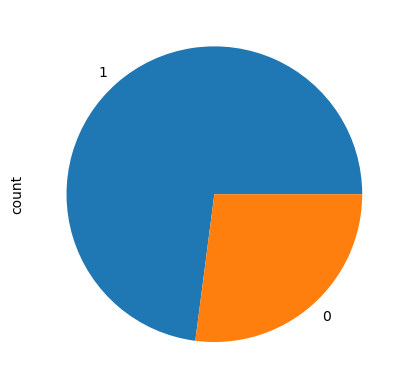

In [240]:
X_test_prediction['Exited'].value_counts().plot(kind='pie')

The details showed that majority of the users are going to exit, based on the dataset. lets confirm this with the y_test 

**Now lets try out Random Forest**

In [241]:
X_test_prediction_rf= X_test.copy()
X_test_prediction_rf['Exited']= pred6
X_test_prediction_rf['Exited'].value_counts()

Exited
1    1611
0    1575
Name: count, dtype: int64

<Axes: ylabel='count'>

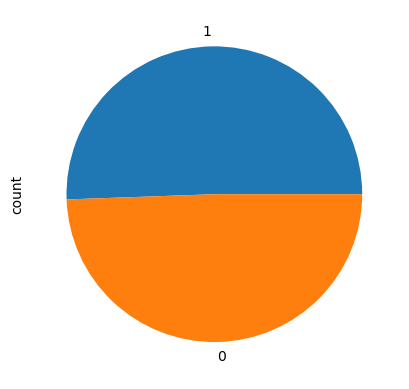

In [244]:
X_test_prediction_rf['Exited'].value_counts().plot(kind='pie')

Now let's take a look at the original data.

In [224]:
X_test_original= X_test.copy()
X_test_original['Exited']= y_test
X_test_original['Exited'].value_counts()

Exited
1    1617
0    1569
Name: count, dtype: int64

In [249]:
X_test_prediction['Exited'].value_counts()[1]

2324

In [247]:
X_test_prediction_rf['Exited'].value_counts()[0]

1575

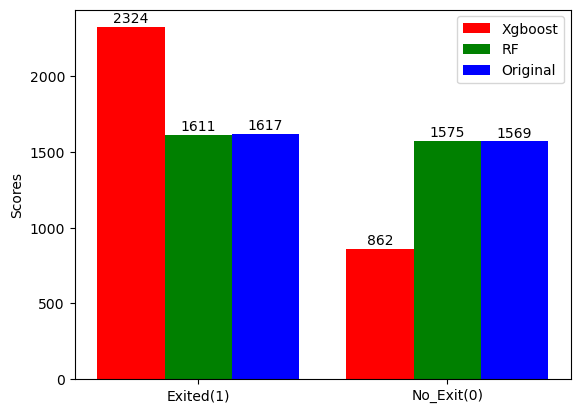

In [254]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [X_test_prediction['Exited'].value_counts()[1], X_test_prediction['Exited'].value_counts()[0]]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [X_test_prediction_rf['Exited'].value_counts()[1],X_test_prediction_rf['Exited'].value_counts()[0]]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [X_test_original['Exited'].value_counts()[1],X_test_original['Exited'].value_counts()[0]]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Exited(1)', 'No_Exit(0)') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Xgboost', 'RF', 'Original') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

As seen in the chart the Random forest predict similar values for both the churn and no churn while the XGboost predict more users as churn as against the no churn. Because it is a churn situation, we can have more customers predicted as churn as long as the value is not overly stretched. it is safer to have all the churners convered than to have some uncovered as in the case of Random forest model. This will mean that the ban will prepare more for customers to not churn which will only add to the value of services provided as against preparing less.

The real question is, if you are the director here, which model will you go with between the two?